# Analisis computacional de datos ambientales - Módulo 1 + ejercicios + notas


## Librerias Pandas, Numpy, Matplotlib

### Series de tiempo!

In [ ]:
#### Lo primero es importar las librerias que necesitamos!

#Pandas es una libreria para leer datos formato excel, csv, o ese tipo de archivos que inician en columnas
import pandas as pd # pd es como vamos a llamar la libreria, como un apodo, en vez de usar el nombre entero.
import numpy as np # Libreria para calculos, uso de vectores, matrices, arreglos de datos, etc!, operaciones!
import matplotlib.pyplot as plt # Libreria para graficas, seaborn es tambien muy util
import glob # Para buscar archivos y carpetas!, se necesita saber un poco de bash
import matplotlib.gridspec as gridspec # Para crear una grilla de graficas!

## Numpy

In [ ]:
## Creemos una variable!

x = 2 # Aqui le decimos al programa que la letra x debe ser guardada en memoria como 2

print(x == 2) # aqui preguntamos si x es exactamente igual a 2

x = np.array([1,2,3,4,5,6]) #aqui creamos un arreglo, o un vector
print(x)

# No es muy practico cierto?
x = np.arange(1,7,1) # creemos el mismo vector, python nunca incluye el numero final!, si ponemos 7, llega a 6
# Lo mismo pasa si ponemos 6.1!, llega a 6
print(x)

# Otra interesante manera es...
x = np.linspace(1,6,6) # inicio, final, y cuantos pasos dentro del inicio y el final!
print(x)
# Aparece un punto!!!, por que?

True
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1. 2. 3. 4. 5. 6.]


In [ ]:
# Podemos por ejemplo crear funciones tambien
def operar_vectores(v1, v2, operacion='suma'):
    """
    Suma o multiplica dos vectores usando numpy.

    Parámetros:
    - v1: numpy array
    - v2: numpy array
    - operacion: 'suma' o 'multiplicacion'

    Retorna:
    - Resultado del cálculo como numpy array
    """
    ## Las 3 comillas sirven para dar la informacion de lo que hace la funcion!
    v1 = np.array(v1)
    v2 = np.array(v2)

    if operacion == 'suma':
        return v1 + v2
    elif operacion == 'multiplicacion':
        return v1 * v2
    else:
        raise ValueError("La operación debe ser 'suma' o 'multiplicacion'.")

In [ ]:
# Ejemplos de uso
## Las siguientes dos variables son listas!!, que son elementos que no se pueden operar!
## por lo que en la funcion deben ser transformados a vectores!
a = [1, 2, 3]
b = [4, 5, 6]

print("Suma:", operar_vectores(a, b, operacion='suma'))
print("Multiplicación:", operar_vectores(a, b, operacion='multiplicacion'))


# como ejercicio, multipliquen dos vectores, pero el input debe ser un vector!
# que pasa si sumamos las dos listas?
print(a+b)

# y si las multiplicamos?
try:
    result = a * b  # This will raise a TypeError in plain Python lists
    print("Result:", result)
except TypeError as e:
    print("TypeError:", e)

# que tal si multiplicamos una lista, por un numero?
print(a*3)

Suma: [5 7 9]
Multiplicación: [ 4 10 18]
[1, 2, 3, 4, 5, 6]
TypeError: can't multiply sequence by non-int of type 'list'
[1, 2, 3, 1, 2, 3, 1, 2, 3]


<Axes: xlabel='Fecha'>

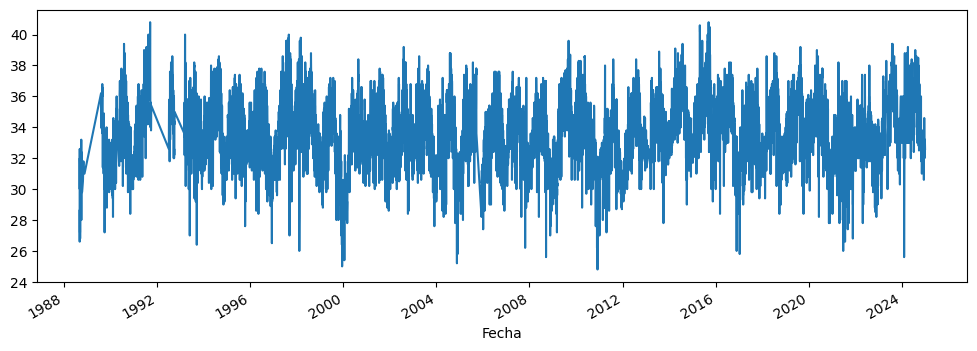

In [ ]:
camino = "/content/Datos/"
df = pd.read_csv(f'{camino}tem_max.csv', parse_dates = True, index_col = 'Fecha')


plt.figure(figsize=(12,4))
df['Valor'].plot()

## Pandas y Matplotlib!

In [ ]:
## Con pandas lo primero es siempre leer los datos!, para lo cual lo mejor es primero tener un camino!
path_aq = '/Users/acasalla/Documents/Postdoc_MSCA-Bridge/USA_Ozone/DATA_ORIGINAL/'
path_met = '/Users/acasalla/Documents/UNAL_Seminars/datos/'

In [ ]:
# Para calidad del aire, podemos solo usar el archivo de pm2.5
df_aq = pd.read_csv(f'{camino}PM25.csv', parse_dates = True, index_col = 0)
# parse_dates es para decirle que la columna que sera el indice esta compuesta por fechas
# index_col es para decirle que numero de columna debe ser considerada el indice, 0 es la primera!
# python siempre cuenta desde 0
df_aq

,BOLIVIA,BOSA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,GUAYMARAL,JAZMIN,KENNEDY,LAS FERIAS,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME,COLINA,MOVIL FONTIBON,MOVIL 7MA
FECHA,,,,,,,,,,,,,,,,,,,,
1/01/2013 0:00,NaN,NaN,NaN,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/01/2013 1:00,NaN,NaN,NaN,33.8,NaN,NaN,NaN,NaN,104.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/01/2013 2:00,NaN,NaN,NaN,20.2,NaN,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/01/2013 3:00,NaN,NaN,NaN,19.1,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/01/2013 4:00,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/12/2022 19:00,32.1,NaN,NaN,31.0,26.2,20.9,31.0,25.8,33.1,33.0,29.0,21.9,50.0,12.0,41.0,27.0,31.8,30.4,31.6,NaN
31/12/2022 20:00,29.5,NaN,NaN,26.0,27.5,33.7,26.0,24.3,35.5,25.0,29.0,25.2,54.0,20.0,43.0,27.0,38.7,23.1,36.2,NaN
31/12/2022 21:00,26.0,NaN,NaN,23.0,33.5,22.3,27.0,21.2,44.6,24.0,35.0,18.8,52.0,34.0,39.0,32.0,46.7,20.5,19.6,NaN


In [ ]:
#### Pero y que pasa si en vez de leer un archivo quiero leer varios
filenames_met = glob.glob(f'{path_met}*') # El asterisco quiere decir todo dentro de la carpeta!
filenames_met

[]

In [ ]:
## Como vemos, aqui estan todos los archivos de meteorologia que tenemos!
### Podemos leerlos todos, pero como sin variables diferentes lo mejor seria dejarlos en variables separadas
#### Esto es algo molesto, por lo que existen los diccionarios!

dict_met = {} # Iniciamos el diccionario!

# pero antes un ejemplo
dict_met['Ejemplo'] = np.arange(0,20.01)
print(dict_met)
print(dict_met['Ejemplo'])

{'Ejemplo': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])}
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


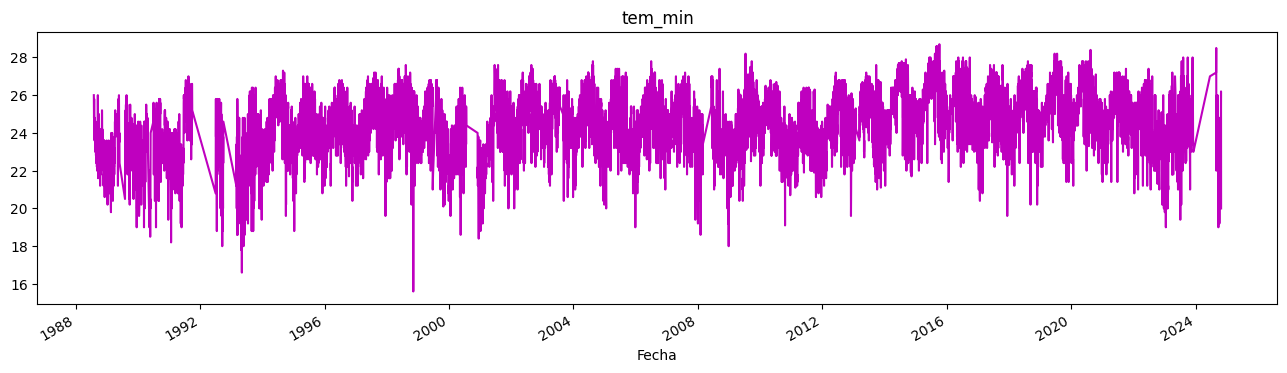

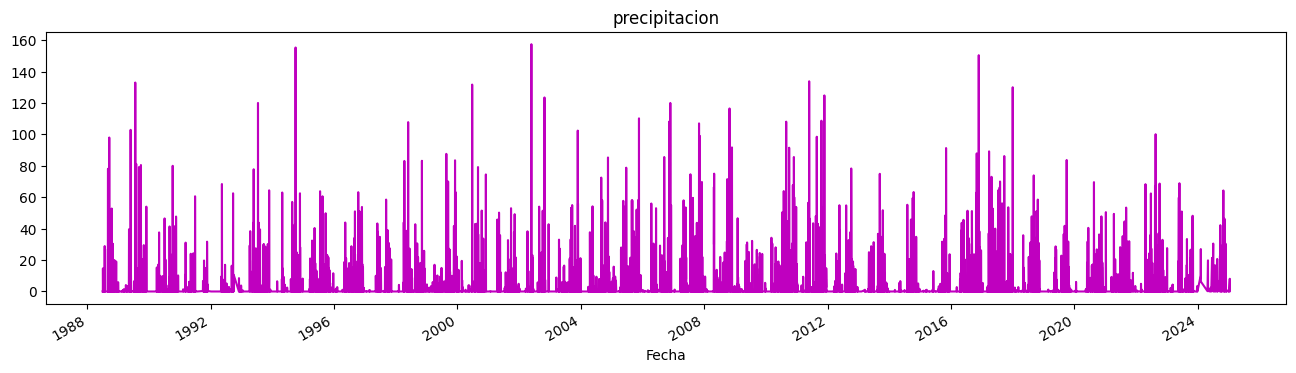

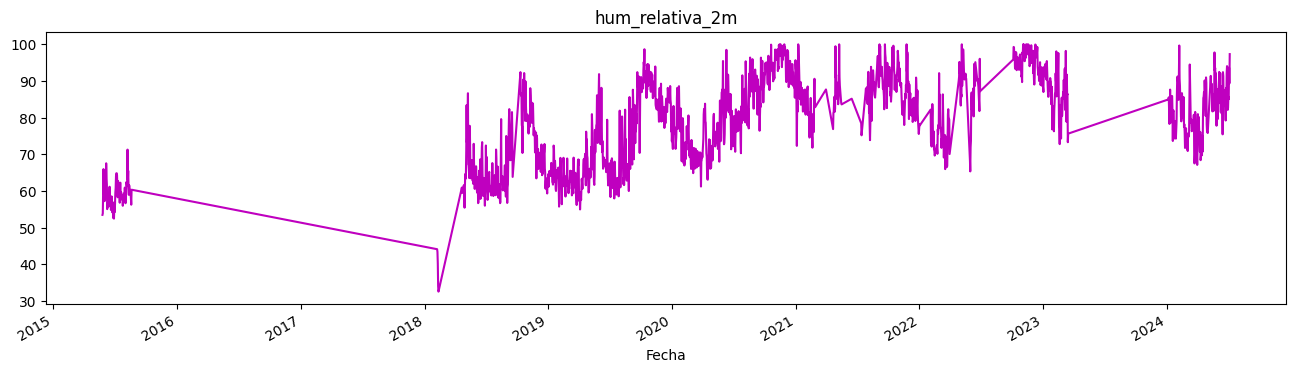

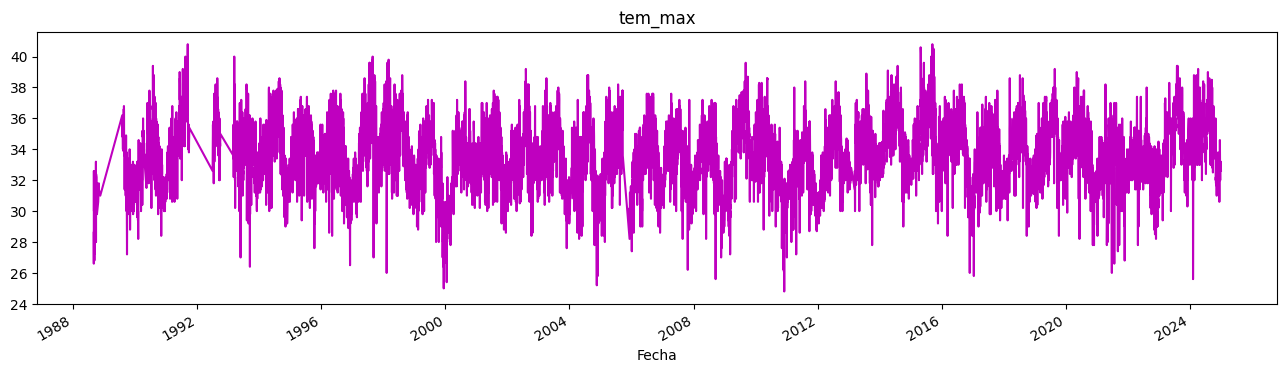

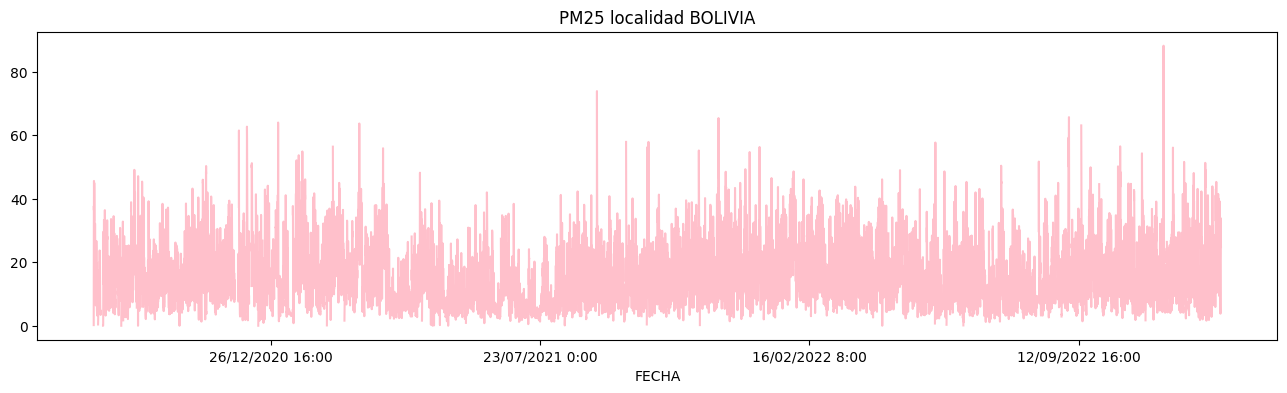

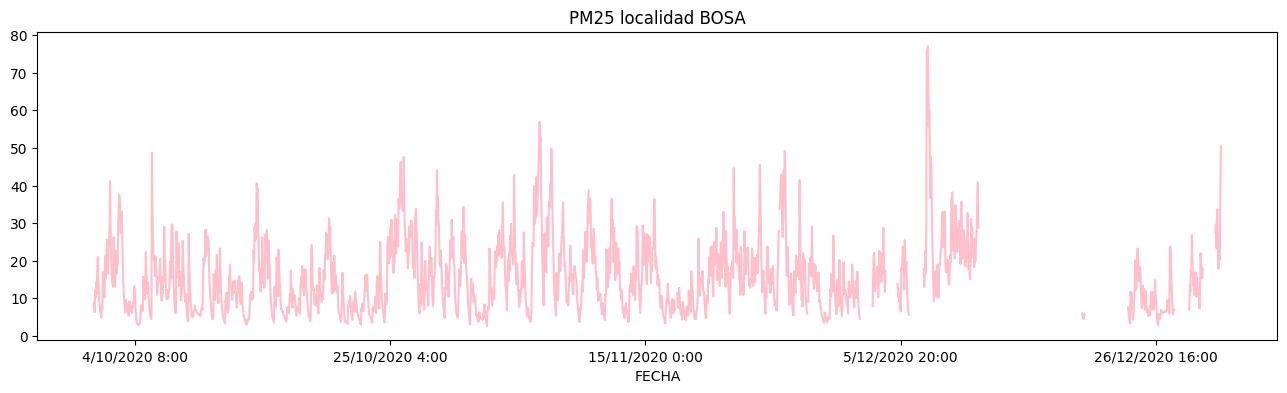

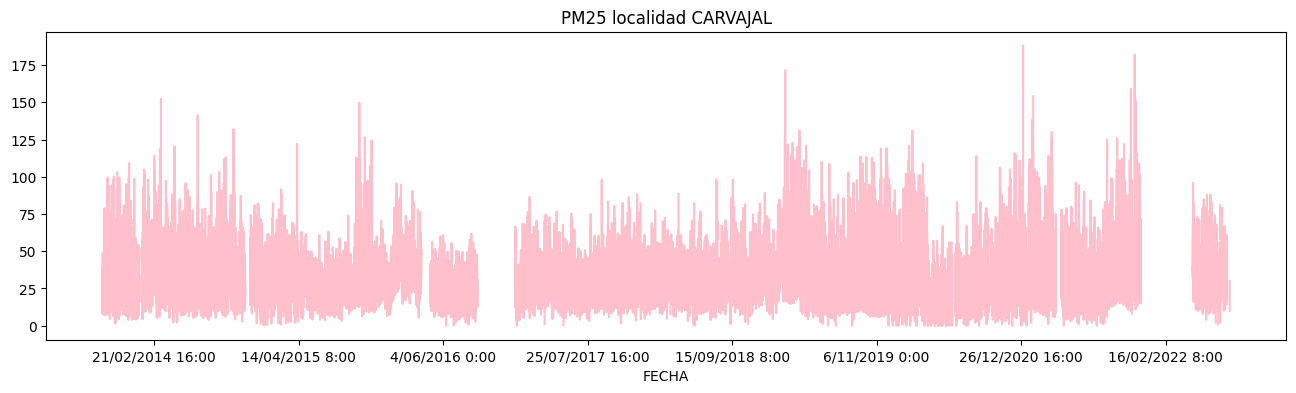

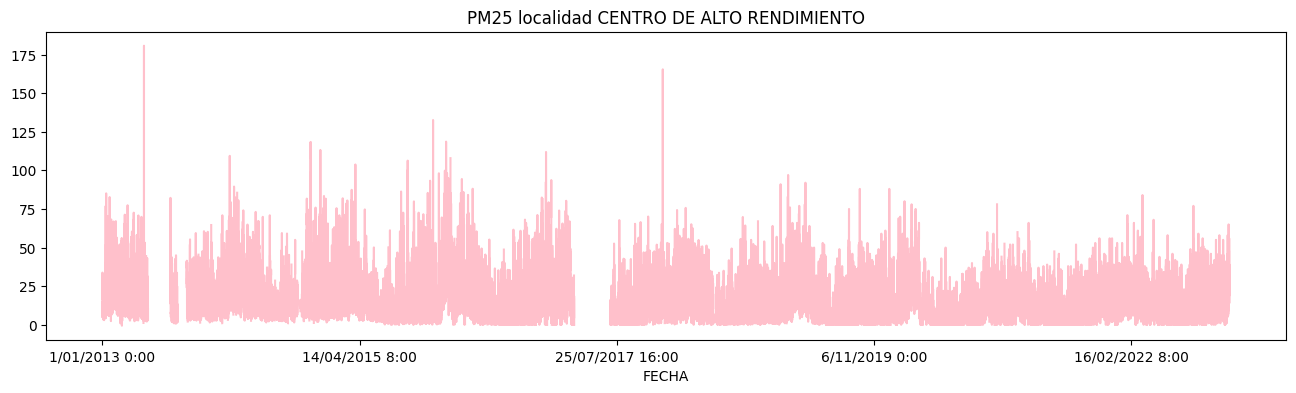

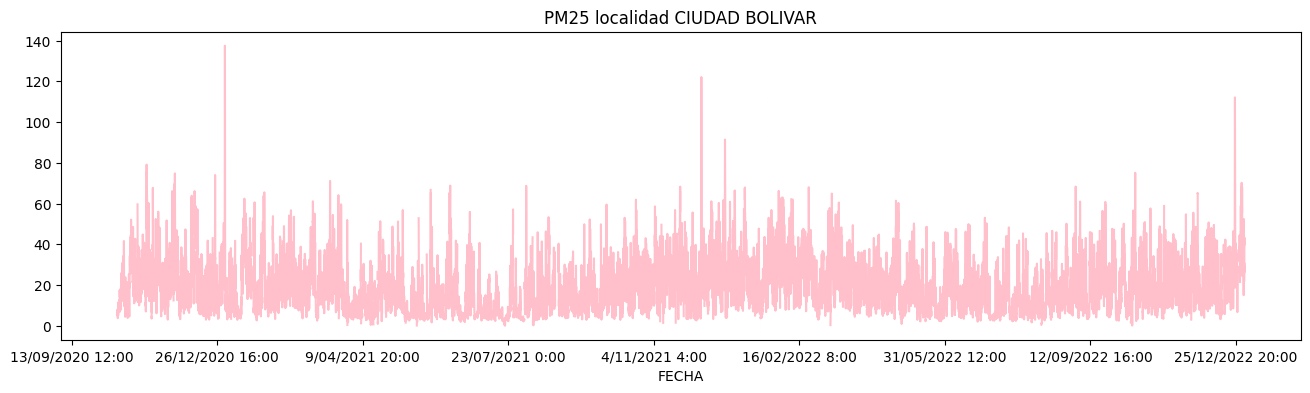

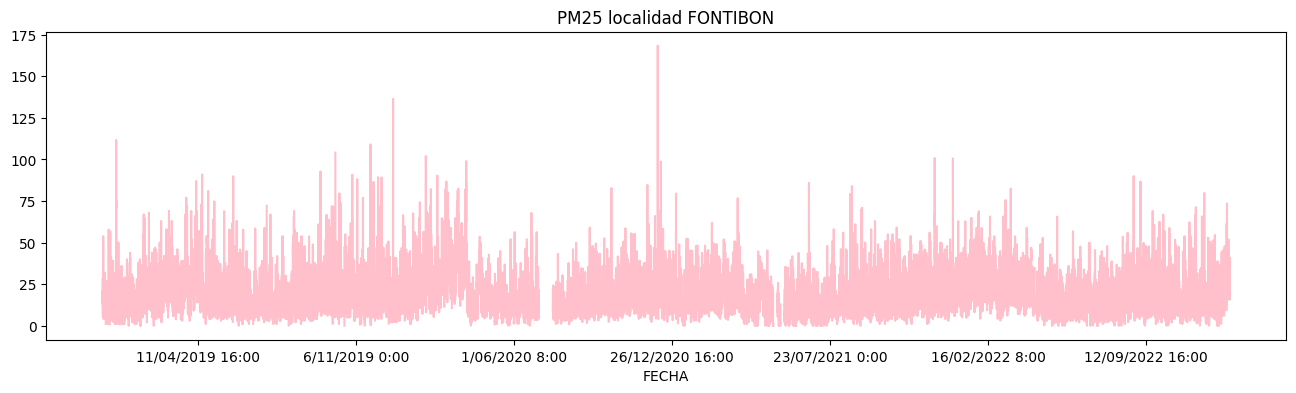

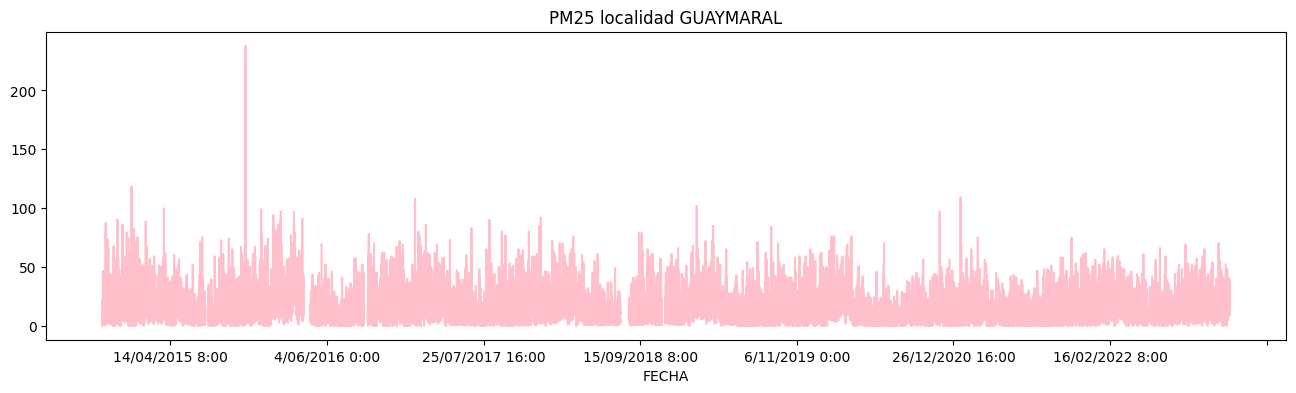

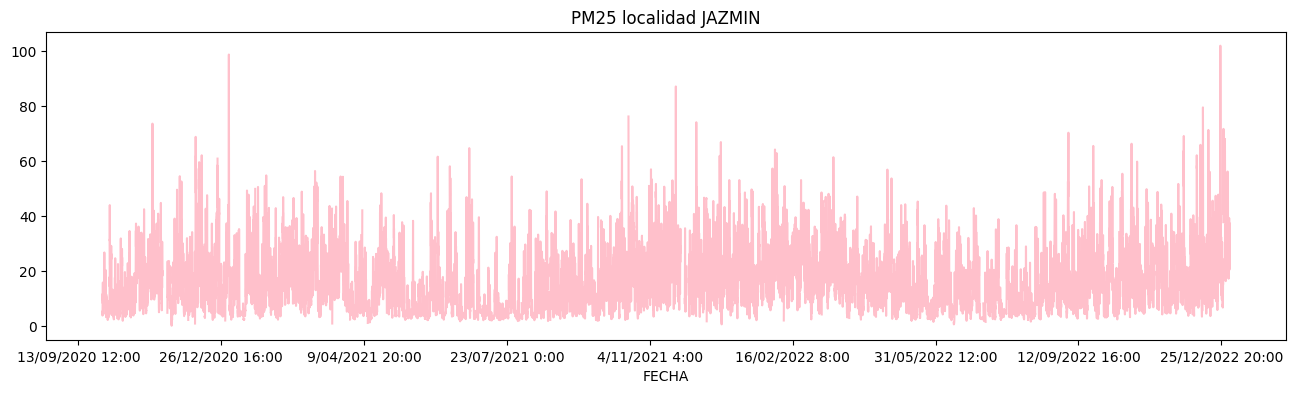

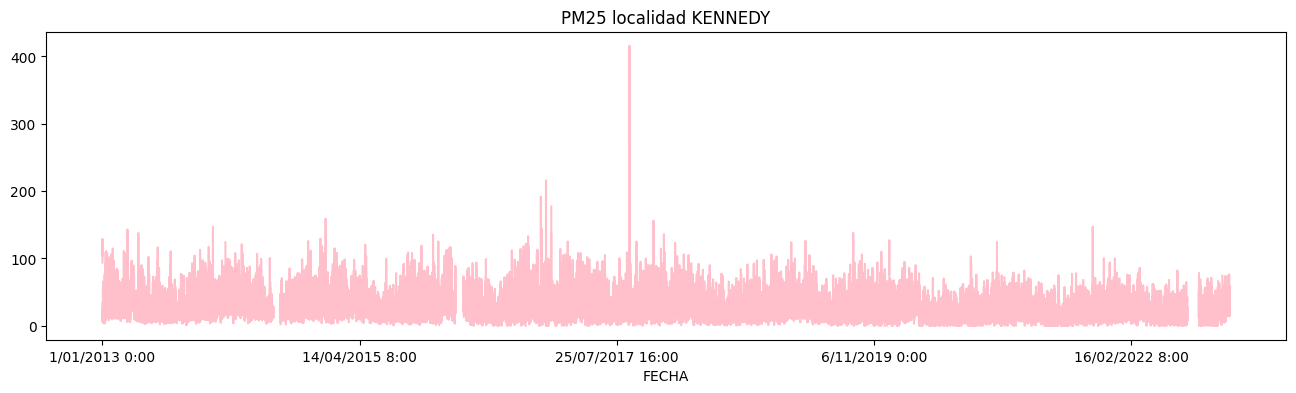

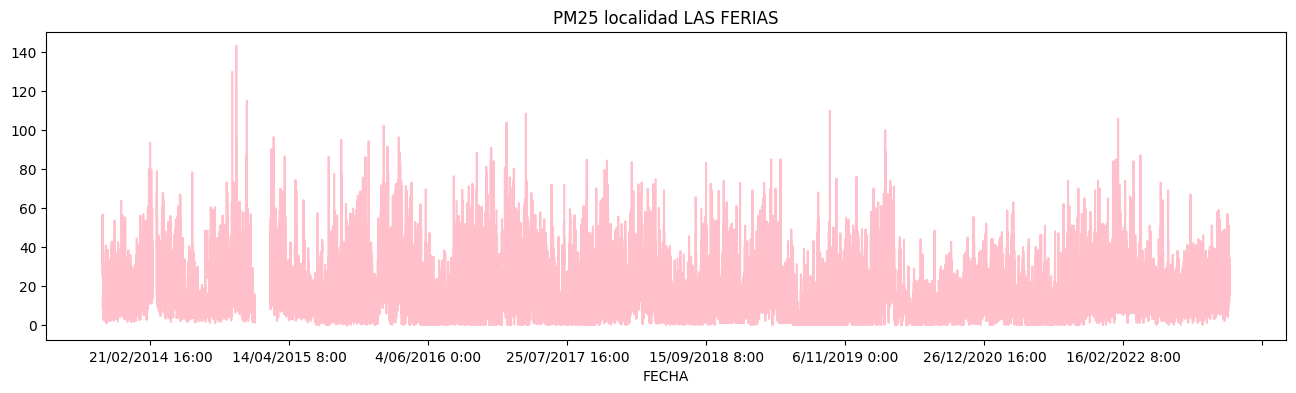

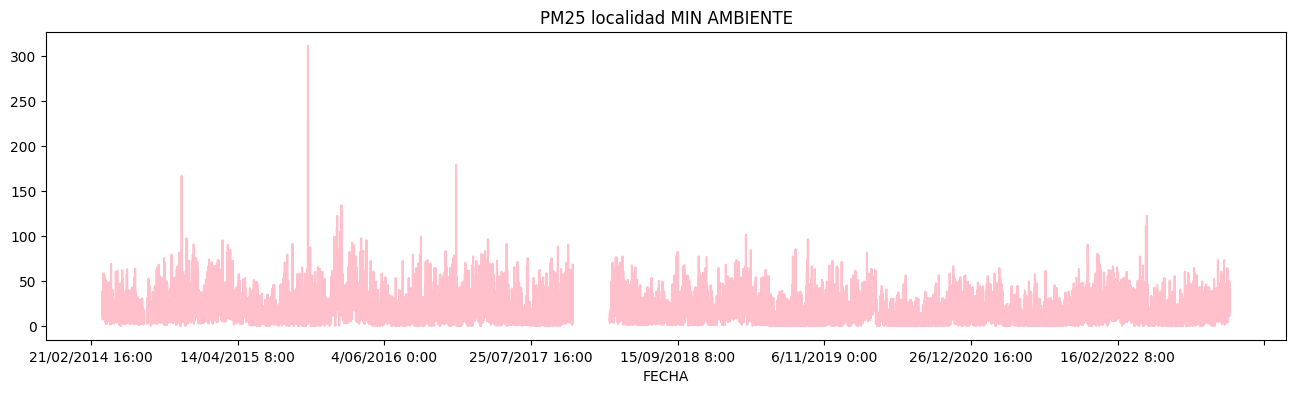

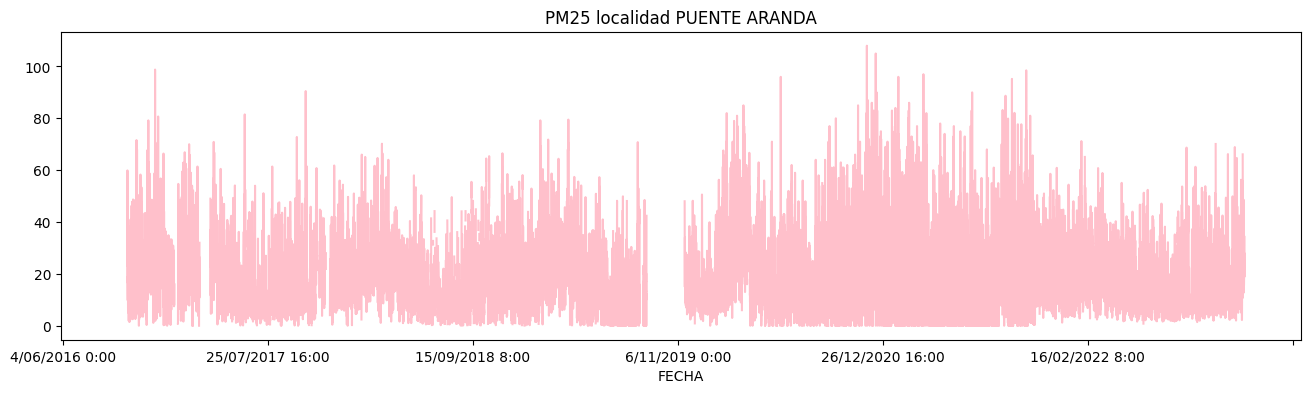

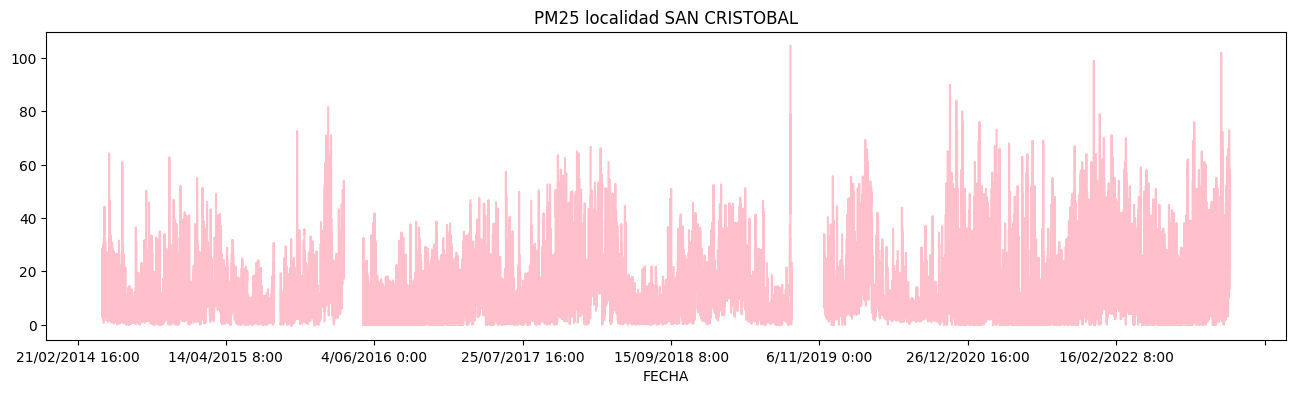

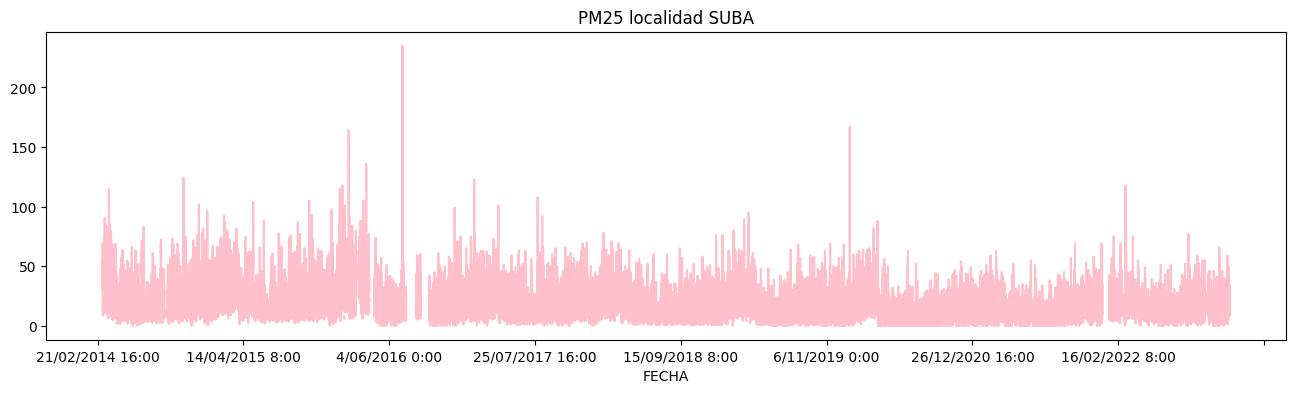

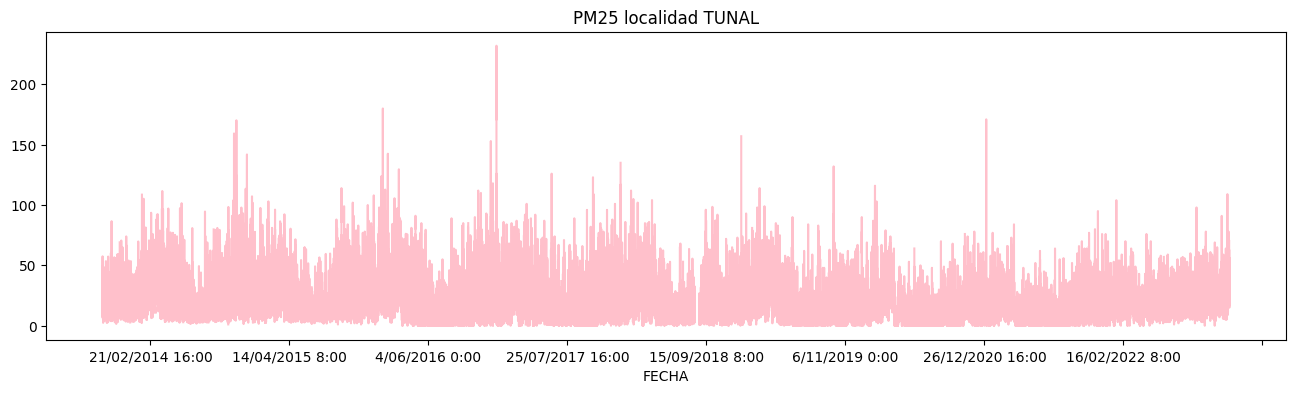

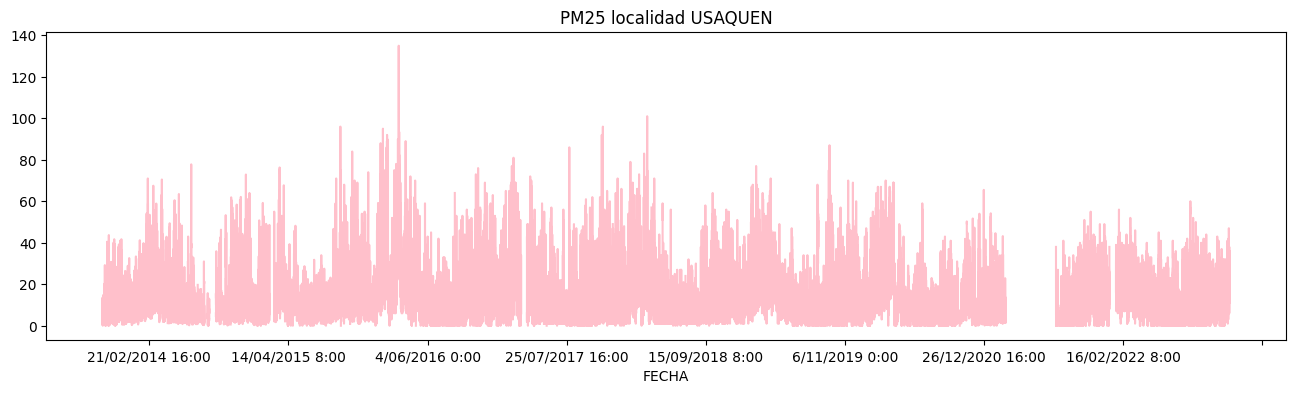

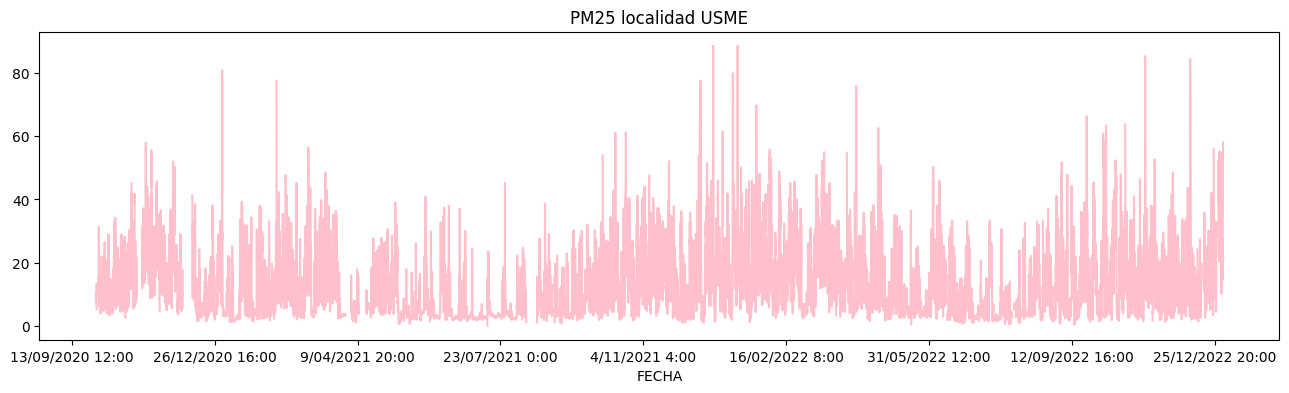

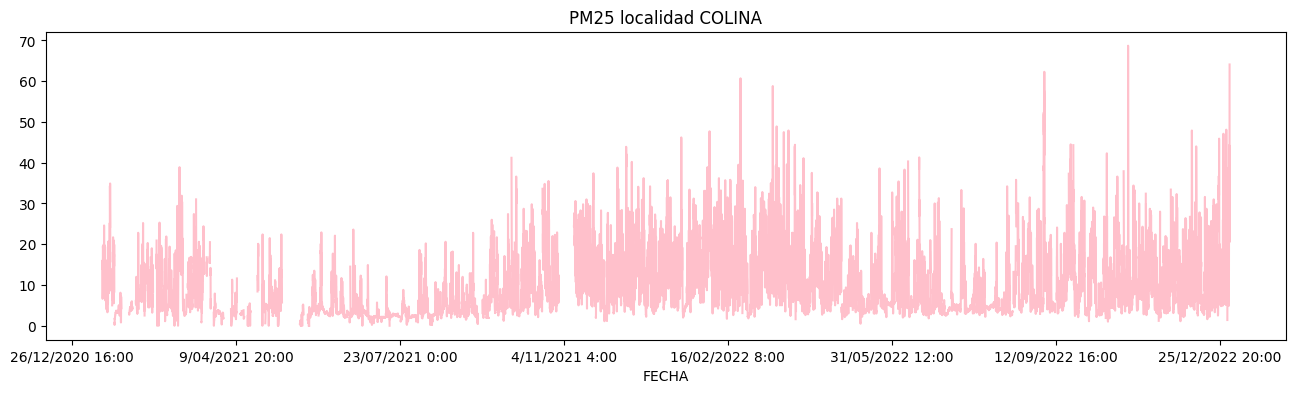

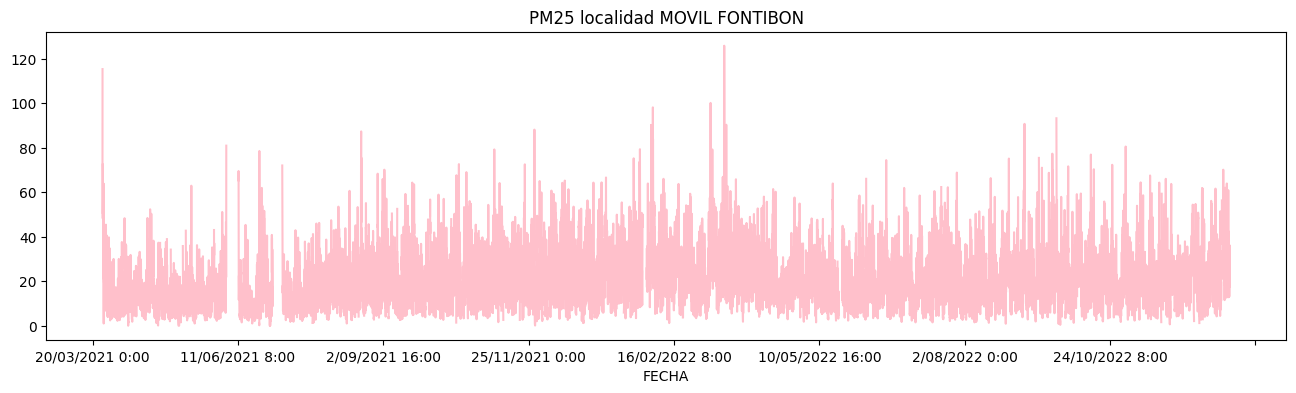

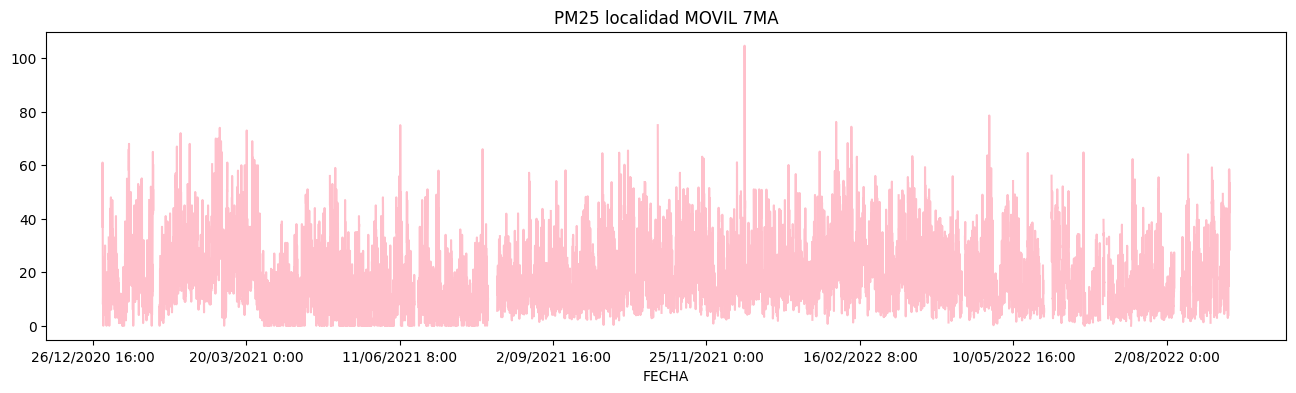

In [ ]:
#imprimir agrupando por fechas y en pm25 por

camino = "/content/Datos/"
files = glob.glob(f'{camino}*')

dict_met={}
nombres = []

for filename in files:
  nombre = filename[15:-4]
  if nombre != 'PM25':
    nombres.append(nombre)
    ruta = f'{camino}{nombre}.csv'
    df_tmp = pd.read_csv(ruta, parse_dates = True, index_col = 'Fecha')
    dict_met[nombre] = df_tmp


for nombre in nombres:
  plt.figure(figsize=(16,4))
  dict_met[nombre]["Valor"].plot(color = 'm')
  plt.title(nombre)
  plt.show()

df_tmp = pd.read_csv(f'{camino}PM25.csv', parse_dates = True, index_col = 'FECHA')
columns_to_plot = ['BOLIVIA','BOSA','CARVAJAL','CENTRO DE ALTO RENDIMIENTO','CIUDAD BOLIVAR','FONTIBON','GUAYMARAL','JAZMIN','KENNEDY','LAS FERIAS','MIN AMBIENTE','PUENTE ARANDA','SAN CRISTOBAL','SUBA','TUNAL','USAQUEN','USME','COLINA','MOVIL FONTIBON','MOVIL 7MA']
for column in columns_to_plot:
  plt.figure(figsize=(16,4))
  df_tmp[column].plot(color = 'pink')
  title = 'PM25 localidad '+ column
  plt.title(title)
  plt.show()


In [ ]:
## Ahora si usemolo para guardar las variables!
dict_met = {}
var_names = []

for filename in filenames_met:
    ## Necesitamos un nombre para la entrada del diccionario, lo mas sencillo seria, tomarlo de los archivos!
    name = filename[46:]
    print(name)
    # de paso creemos una lista con los nombres, para que usarlos despues sea mas facil
    var_names.append(name) # Append pega a una lista existente el valor que se le de
    # asi pegara uno a uno los nombres de las variables
    dict_met[name] = pd.read_csv(filename, parse_dates = True, index_col = 'Fecha')
    # que pasa si usamos index_col igual a un numero?

<Axes: xlabel='Fecha'>

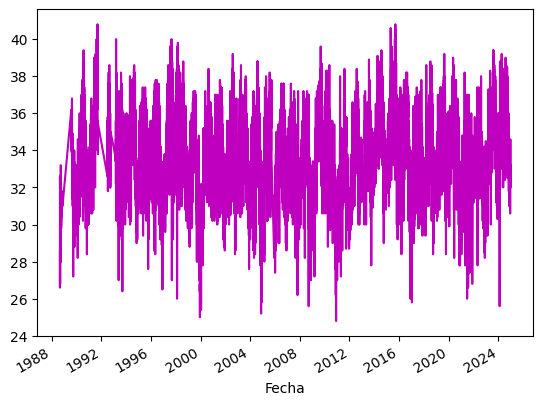

In [ ]:
#plt.figure(figsize = (10,4))
dict_met['tem_max']['Valor'].plot(color = 'm') #pueden hacer la grafica mas grande?

## podrian graficas no solo una sino todas al tiempo? en un ciclo?

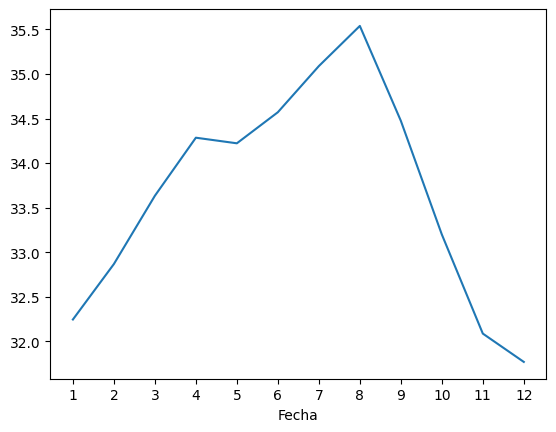

/tmp/ipython-input-615867874.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dict_met['tem_max']['Valor'].resample('M').mean().plot(color = 'm')


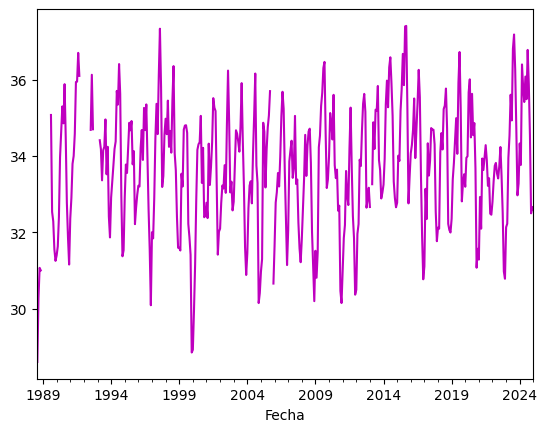

/tmp/ipython-input-615867874.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dict_met['tem_max']['Valor'].resample('Y').mean().plot(color = 'm')#style='-o')


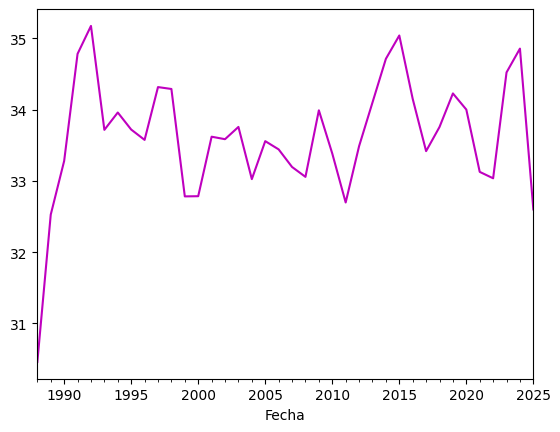

In [ ]:
# Que tal si usamos las fechas para ver como evoluciona mensualmente, promedio multi-anual mensual
dict_met['tem_max']['Valor'].groupby(dict_met['tem_max'].index.month).mean().plot()#style='-o')
plt.xticks(np.arange(1,12.1))
plt.show()

dict_met['tem_max']['Valor'].resample('M').mean().plot(color = 'm')
plt.show()

dict_met['tem_max']['Valor'].resample('Y').mean().plot(color = 'm')#style='-o')
plt.show()


### Pueden hacer esto mismo para todas las variables en un ciclo, pueden luego incluir los valores de PM2.5?
## Pueden ademas agregar la desviacion estandar, una por encima y una por debajo del promedio?

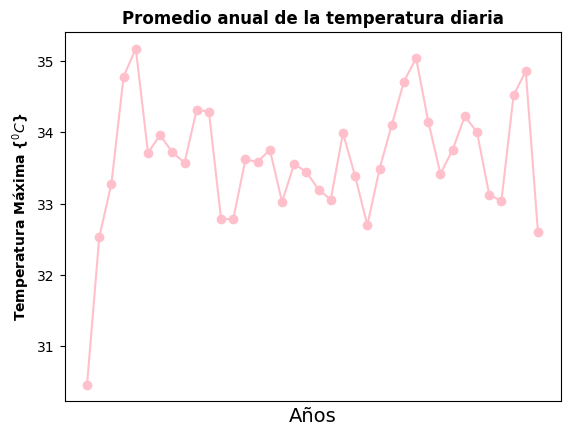

In [ ]:
dict_met['tem_max']['Valor'].groupby(dict_met['tem_max'].index.year).mean().plot(style='-o', color = 'pink')
plt.xticks(np.arange(1,1))
plt.ylabel('Temperatura Máxima {$^{0}C$}', fontweight = 'bold')
plt.title('Promedio anual de la temperatura diaria', fontweight = 'bold')
plt.xlabel('Años', fontsize = 14)
plt.show()

In [ ]:

#dict_met['tem_max']['Valor'].resample('M').mean().plot() #promedio por valores mensuales de temperatura máxima


/tmp/ipython-input-1291309135.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = dict_met[name]['Valor'].resample('M')


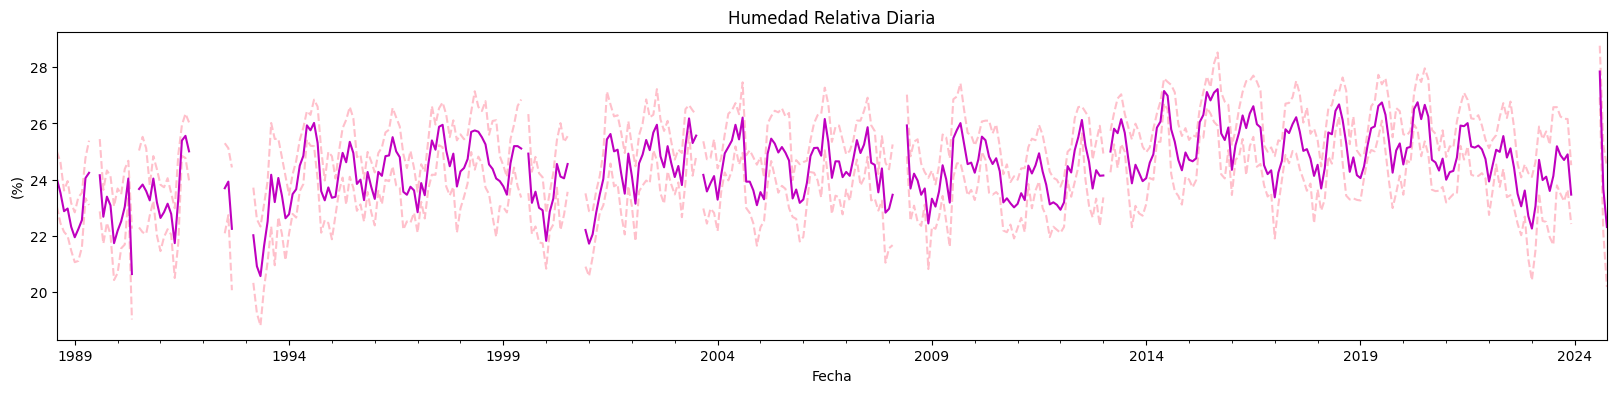

/tmp/ipython-input-1291309135.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = dict_met[name]['Valor'].resample('M')


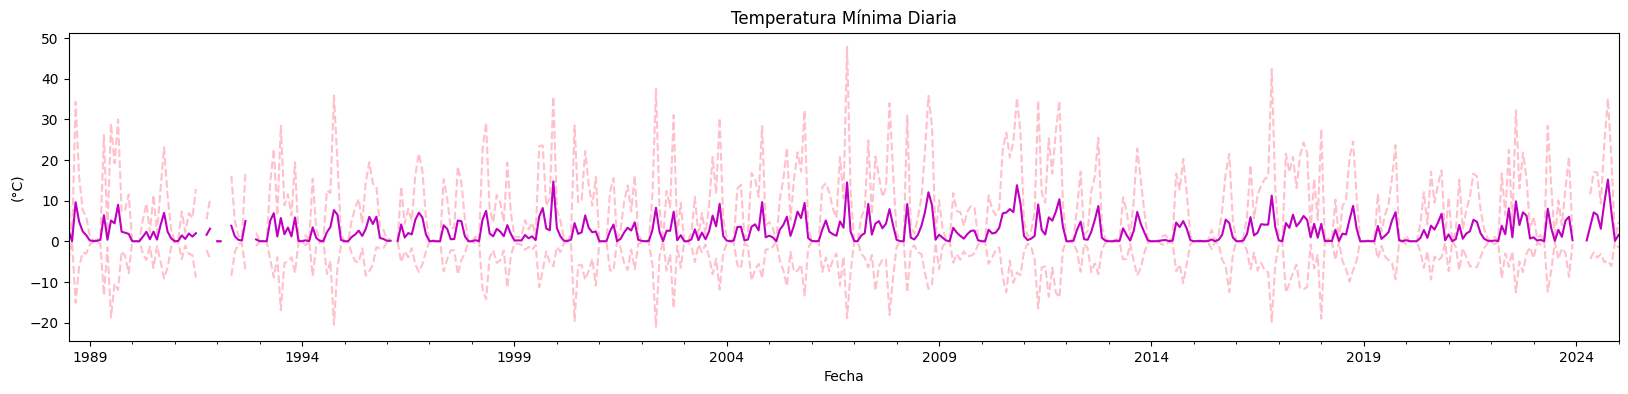

/tmp/ipython-input-1291309135.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = dict_met[name]['Valor'].resample('M')


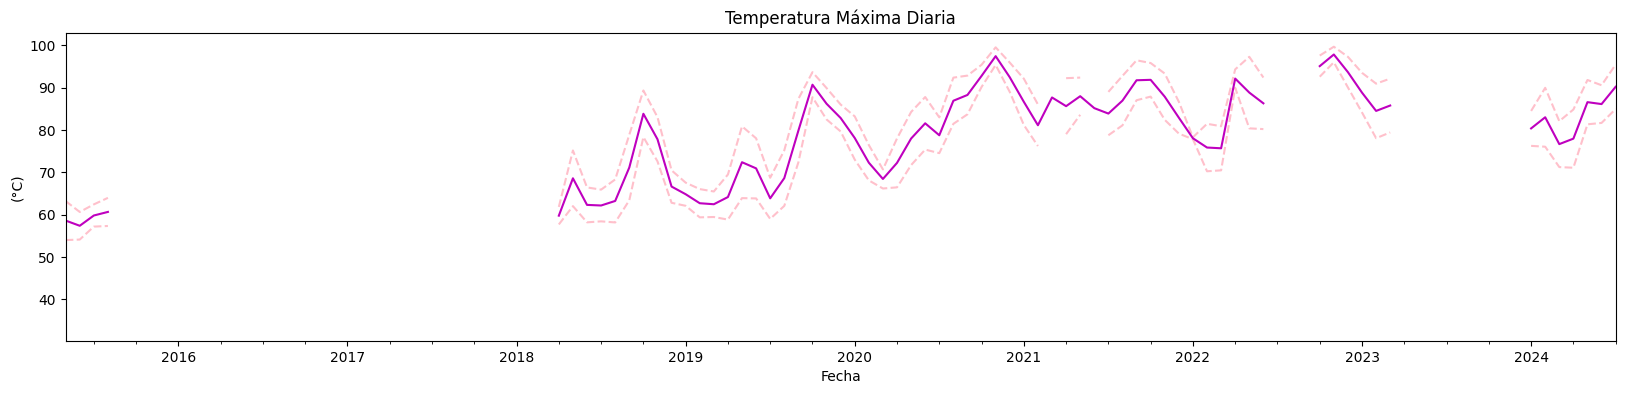

/tmp/ipython-input-1291309135.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = dict_met[name]['Valor'].resample('M')


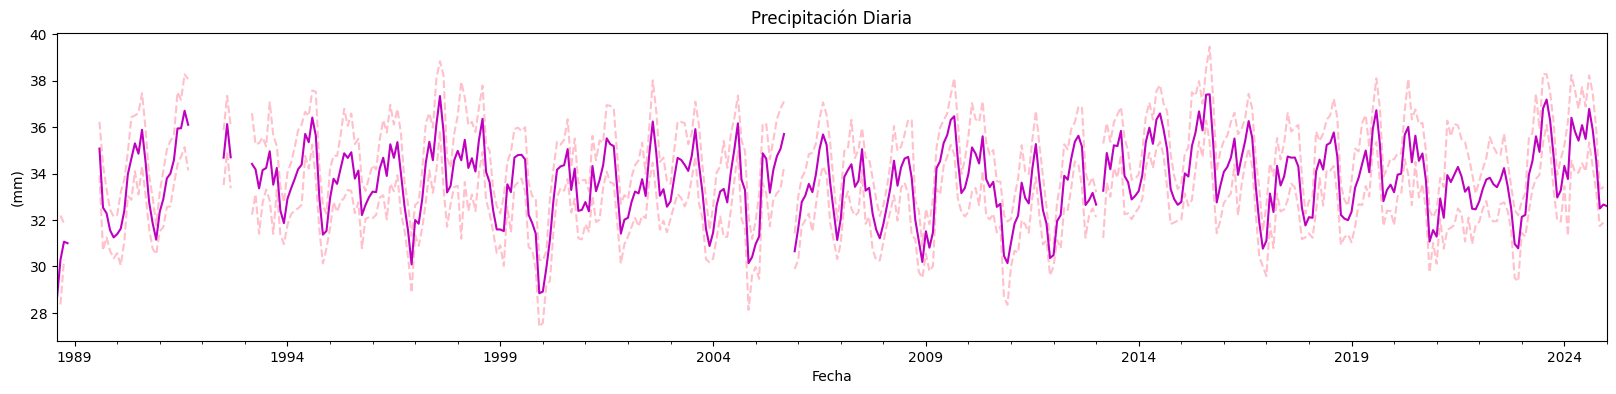

In [ ]:
titles = [
    'Humedad Relativa Diaria',
    'Temperatura Mínima Diaria',
    'Temperatura Máxima Diaria',
    'Precipitación Diaria'
]

ylabels = [
    '(%)',
    '(°C)',
    '(°C)',
    '(mm)'
]


for i, name in enumerate(nombres):
    plt.figure(figsize=(20, 4))

    monthly_data = dict_met[name]['Valor'].resample('M')
    mean = monthly_data.mean()
    std = monthly_data.std()

    (mean+std).plot(color = 'pink', linestyle = '--')
    (mean-std).plot(color = 'pink', linestyle = '--')
    mean.plot(color = 'm')

    plt.title(titles[i])
    plt.ylabel(ylabels[i])
    plt.show()

In [ ]:
# Para hacerlo por temporadas se necesita hacer un mapeo de las fechas!
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'DJF'
    elif month in [3, 4, 5]:
        return 'MAM'
    elif month in [6, 7, 8]:
        return 'JJA'
    elif month in [9, 10, 11]:
        return 'SON'

In [ ]:
# Primero se crea el indice!
seasons = dict_met['tem_max']['Valor'].index.month.map(month_to_season)

# Agrupar y calcular promedio
seasonal_mean = dict_met['tem_max']['Valor'].groupby(seasons).mean()

# Normalmente, el orden no es climatologico! entonces siempre es mejor cambiarlo!
# Pero no es estrictamente necesario
seasonal_mean = seasonal_mean.loc[['DJF', 'MAM', 'JJA', 'SON']]

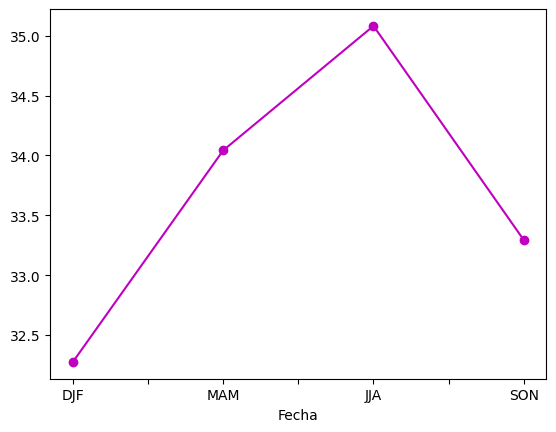

In [ ]:
seasonal_mean.plot(style='-o', color = 'm')
plt.show()

<Figure size 600x400 with 0 Axes>

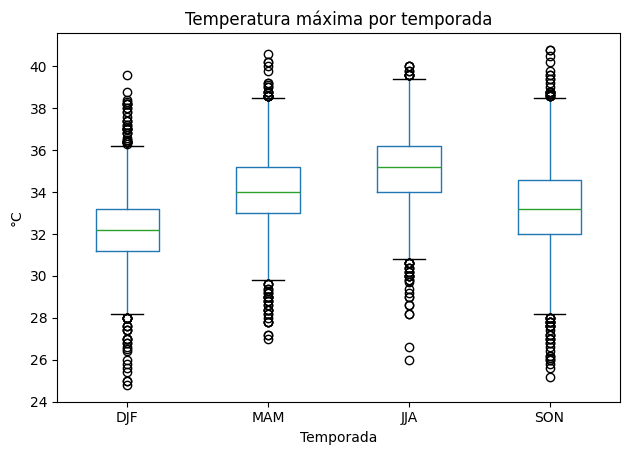

In [ ]:
# Asegurar índice datetime
series = dict_met['tem_max']['Valor']

# Crear columna de temporada
season = series.index.month.map(month_to_season)

# Crear DataFrame para graficarH
df_season = pd.DataFrame({'Valor': series.values, 'Temporada': season})
# Ordenar temporadas (opcional, para el boxplot)
df_season['Temporada'] = pd.Categorical(df_season['Temporada'],
                                        categories=['DJF', 'MAM', 'JJA', 'SON'],
                                        ordered=True)

# Graficar boxplot por temporada
plt.figure(figsize=(6, 4))
df_season.boxplot(column='Valor', by='Temporada', grid=False)
plt.title('Temperatura máxima por temporada')
plt.suptitle('')
plt.ylabel('°C')
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

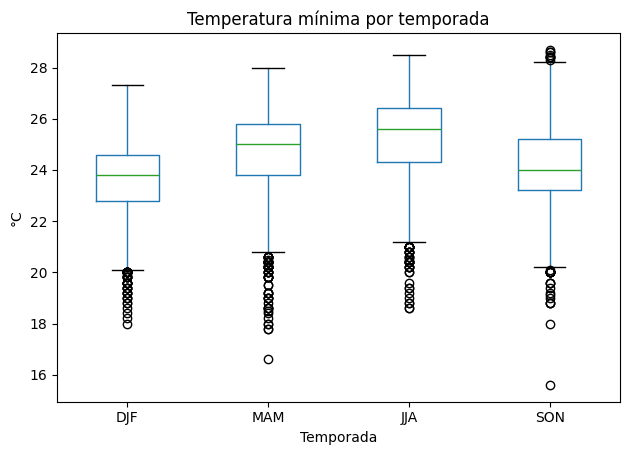

In [ ]:
# Asegurar índice datetime
series = dict_met['tem_min']['Valor']

# Crear columna de temporada
season = series.index.month.map(month_to_season)

# Crear DataFrame para graficar
df_season = pd.DataFrame({'Valor': series.values, 'Temporada': season})
# Ordenar temporadas (opcional, para el boxplot)
df_season['Temporada'] = pd.Categorical(df_season['Temporada'],
                                        categories=['DJF', 'MAM', 'JJA', 'SON'],
                                        ordered=True)

# Graficar boxplot por temporada
plt.figure(figsize=(6, 4))
df_season.boxplot(column='Valor', by='Temporada', grid=False)
plt.title('Temperatura mínima por temporada')


plt.suptitle('')
plt.ylabel('°C')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

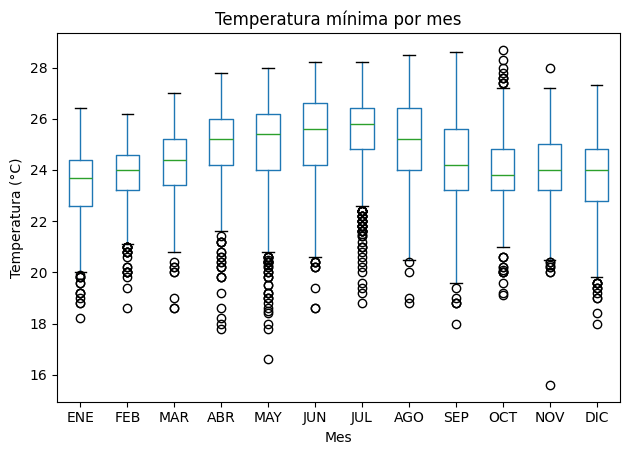

In [ ]:
#temperatura mínima por

meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN',
                 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']

# Crear DataFrame para graficar
series = dict_met['tem_min']['Valor']

df_mes = pd.DataFrame({
    'Valor': series.values,
    'Mes': series.index.month
})

plt.figure(figsize=(10, 6))
df_mes.boxplot(column='Valor', by='Mes', grid=False)
plt.title('Temperatura mínima por mes')
plt.suptitle('')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Mes')
plt.xticks(range(1, 13), meses)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

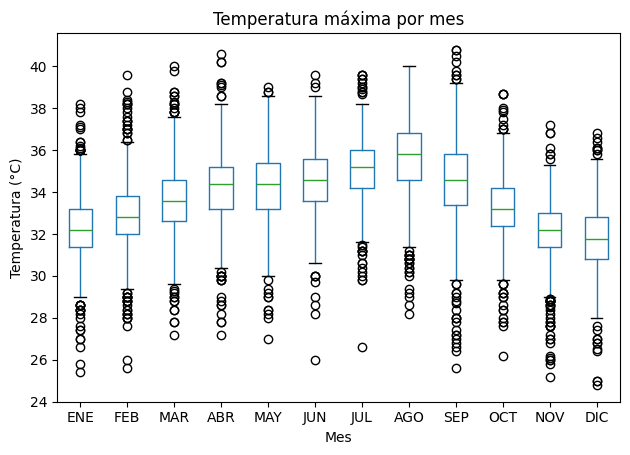

In [ ]:
#Temperatura máxima por mes
series2 = dict_met['tem_max']['Valor']

df_mes = pd.DataFrame({
    'Valor': series2.values,
    'Mes': series2.index.month
})

plt.figure(figsize=(10, 6))
df_mes.boxplot(column='Valor', by='Mes', grid=False)
plt.title('Temperatura máxima por mes')
plt.suptitle('')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Mes')
plt.xticks(range(1, 13), meses)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

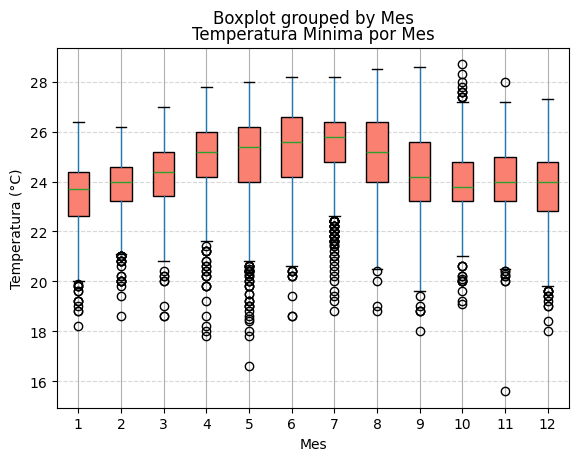

<Figure size 1000x500 with 0 Axes>

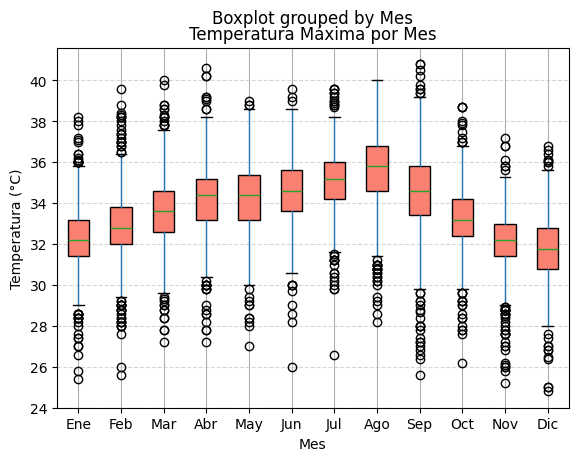

In [ ]:
temp_min = dict_met['tem_min']['Valor']
temp_max = dict_met['tem_max']['Valor']

df_min = pd.DataFrame({
    'Valor': temp_min.values,
    'Mes': temp_min.index.month
})

df_max = pd.DataFrame({
    'Valor': temp_max.values,
    'Mes': temp_max.index.month
})

meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# --- Gráfica 1: Temperatura mínima ---
plt.figure(figsize=(10, 5))
df_min.boxplot(column = 'Valor', by = 'Mes', patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title('Temperatura Mínima por Mes')
plt.ylabel('Temperatura (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- Gráfica 2: Temperatura máxima ---
plt.figure(figsize=(10, 5))
df_max.boxplot(column = 'Valor', by = 'Mes', patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title('Temperatura Máxima por Mes')
plt.ylabel('Temperatura (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(ticks=range(1, 13), labels=meses)
plt.show()

In [1]:
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
titles = [
    'Humedad Relativa Diaria',
    'Temperatura Mínima Diaria',
    'Temperatura Máxima Diaria',
    'Precipitación Diaria'
]
ylabels = [
    '(%)',
    '(°C)',
    '(°C)',
    '(mm)'
]
print(nombres)

for i, name in enumerate(nombres):
  plt.figure(figsize=(20, 4))
  r = dict_met[nombres[i]]['Valor']
  df= pd.DataFrame({
    'Valor': r.values,
    'Mes': r.index.month
  })

  plt.figure(figsize=(10, 5))
  df.boxplot(column = 'Valor', by = 'Mes', patch_artist=True, boxprops=dict(facecolor='pink'))
  plt.title(titles[i])
  plt.ylabel(ylabels[i])
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.xticks(ticks=range(1, 13), labels=meses)
  plt.show()


''' PARA LAS LOCALIDAD>ES EN PM25
df_tmp = pd.read_csv(f'{camino}PM25.csv', parse_dates = True, index_col = 'FECHA')
df_tmp.index = pd.to_datetime(df_tmp.index, format = 'mixed', dayfirst=True)
columns_to_plot = ['BOLIVIA','BOSA','CARVAJAL','CENTRO DE ALTO RENDIMIENTO','CIUDAD BOLIVAR','FONTIBON','GUAYMARAL','JAZMIN','KENNEDY','LAS FERIAS','MIN AMBIENTE','PUENTE ARANDA','SAN CRISTOBAL','SUBA','TUNAL','USAQUEN','USME','COLINA','MOVIL FONTIBON','MOVIL 7MA']

series = df_tmp.index


for column in columns_to_plot:
  df_loco = pd.DataFrame({
    'Month': series.index.month,
    column: series.index.year
    'Mes': series.index.month
  })
  plt.figure(figsize=(10, 5))
  df.boxplot(column = column, by = df_tmp['FECHA'], patch_artist=True, boxprops=dict(facecolor='m'))
  plt.title(titles[i])
  plt.ylabel(ylabels[i])
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.xticks(ticks=range(1, 13), labels=meses)
  plt.show()


'''

NameError: name 'nombres' is not defined

<Figure size 800x400 with 0 Axes>

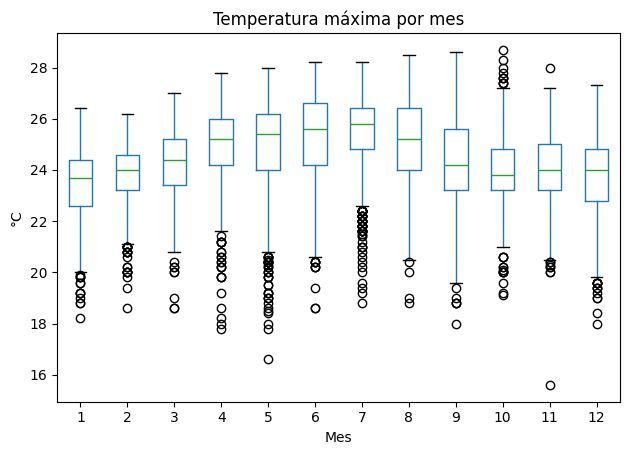

In [ ]:
# Agregar columna de mes
df_month = pd.DataFrame({'Valor': series.values, 'Mes': series.index.month})

# Graficar boxplot por mes
plt.figure(figsize=(8, 4))
df_month.boxplot(column='Valor', by='Mes', grid=False)
plt.title('Temperatura máxima por mes')
plt.suptitle('')
plt.ylabel('°C')
plt.xlabel('Mes')
plt.tight_layout()
plt.show()

### Ejercicio


Realicen cambios a los boxplots, agreguen el promedio, cambien la longitud de los bigotes, etc, agreguen o cambien 3 cosas, que no sean solo el color!

Ademas hagan lo mismo para el resto de variables! Mejor si pueden hacerlo todo en un ciclo, agreguen, aunque no tiene porque ser dentro del ciclo, la variable PM2.5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar datetime
tem = dict_met['tem_max']['Valor']
hum = dict_met['hum_relativa_2m']['Valor']

# Crear DataFrames con columna 'Mes'
df_tem = pd.DataFrame({'Valor': tem.values, 'Mes': tem.index.month})
df_hum = pd.DataFrame({'Valor': hum.values, 'Mes': hum.index.month})

# Preparar datos por mes (lista de listas)
tem_data = [df_tem[df_tem['Mes'] == m]['Valor'].values for m in range(1, 13)]
hum_data = [df_hum[df_hum['Mes'] == m]['Valor'].values for m in range(1, 13)]

# Crear figura y ejes dobles
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Posiciones separadas para que no se encimen
months = range(1, 13)
tem_pos = [m - 0.2 for m in months]
hum_pos = [m + 0.2 for m in months]

# Boxplots de temperatura
bp1 = ax1.boxplot(tem_data, positions=tem_pos, widths=0.35,
                  patch_artist=True, boxprops=dict(facecolor='tomato'),
                  medianprops=dict(color='black'))

# Boxplots de humedad
bp2 = ax2.boxplot(hum_data, positions=hum_pos, widths=0.35,
                  patch_artist=True, boxprops=dict(facecolor='skyblue'),
                  medianprops=dict(color='black'))

# Etiquetas
ax1.set_ylabel('Temperatura máxima (°C)', color='tomato')
ax2.set_ylabel('Humedad relativa (%)', color='skyblue')
ax1.set_xticks(months)
ax1.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                     'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax1.set_xlabel('Mes')
ax1.set_title('Distribución mensual: Temperatura máxima y Humedad relativa')

# Leyenda manual
import matplotlib.patches as mpatches
t_patch = mpatches.Patch(color='tomato', label='Temp. máxima')
h_patch = mpatches.Patch(color='skyblue', label='Humedad relativa')
plt.legend(handles=[t_patch, h_patch], loc='upper left')

plt.tight_layout()
plt.show()


### Ejercicio

Sigan el procedimiento de la grafica anterior para otras combinaciones de variables, ven alguna combinacion que este correlacionada?

Sabiendo que la estacion es en la guajira, que creen que causa que la estacionalidad sea de esta manera?


Que estacionalidad ven en cuanto al PM2.5, aunque las estaciones estan en Bogota, por que creen que se evoluciona de esa manera?

# Olas de calor y Extremos de precipitacion

Olas de calor: Valor por encima del percentil 90 mensual y anual tanto en tem_max como en tem_min por 3 dias consecutivos

Extremos de precipitacion: percentil 99 diario mensual y anual! y para todos los anhos!, quizas el pdf y el cdf pueden ser de ayuda?

## Olas de calor!

In [ ]:
## Que percentil queremos probar?
percen = 0.9

# Primero guardamos los datos en dos variables!
tem_max = dict_met['tem_max']['Valor']
tem_min = dict_met['tem_min']['Valor']

# -------------------------
# Calculemos el percentil 90 mensual y anual
# -------------------------

# Percentil 90 mensual
p90_max_mes = tem_max.groupby(tem_max.index.month).quantile(percen)
p90_min_mes = tem_min.groupby(tem_min.index.month).quantile(percen)

# Percentil 90 anual (global)
p90_max_anual = tem_max.quantile(percen)
p90_min_anual = tem_min.quantile(percen)

# -------------------------
# Compararemos cada día, en este caso cada valor pq los datos son diarios con los umbrales
# -------------------------

# Obtener el mes de cada fecha
meses_max = tem_max.index.month
meses_min = tem_min.index.month
### Pregunta, por que creen que necesitamos dos meses y no un valor de meses global?

# Condiciones: por encima del percentil mensual y anual
# Condición 1: Basada en percentil ANUAL
cond_max_anual = tem_max > p90_max_anual
cond_min_anual = tem_min > p90_min_anual
dias_calidos_anual = cond_max_anual & cond_min_anual

# Condición 2: Basada en percentil MENSUAL
cond_max_mensual = tem_max > p90_max_mes[meses_max].values
cond_min_mensual = tem_min > p90_min_mes[meses_min].values
dias_calidos_mensual = cond_max_mensual & cond_min_mensual

In [ ]:
# -------------------------
#  Detectar olas de calor: ≥ N días consecutivos por encima de un umbral! el default es 3
# -------------------------

# Función para agrupar secuencias de días cálidos, poniendo un valor default que puede ser cambiado
def detectar_olas(mask, tem_max, tem_min, min_duracion=3):
    """
    Detecta olas (de calor, por ejemplo) en una serie booleana, y guarda
    fecha de inicio, fin y los promedios de temperatura máxima y mínima.

    Parámetros:
    - mask: Serie booleana con índice datetime.
    - tem_max: Serie de temperatura máxima (con mismo índice).
    - tem_min: Serie de temperatura mínima (con mismo índice).
    - min_duracion: número mínimo de días consecutivos para considerar ola.

    Retorna:
    - Lista de diccionarios con información de cada ola detectada.
    """

    eventos = []      # Lista donde se almacenan los eventos detectados
    contador = 0      # Contador para días consecutivos que cumplen condición
    inicio = None     # Fecha de inicio del evento actual (si se está formando uno)

    # Recorremos día a día la serie booleana
    for i, es_calido in enumerate(mask):
        if es_calido:
            # Si el día cumple la condición (True)
            if contador == 0:
                inicio = mask.index[i]  # Guardamos la fecha de inicio del evento
            contador += 1  # Aumentamos el contador de días consecutivos
        else:
            # Si el día no cumple la condición (False)
            if contador >= min_duracion:
                # Si hay suficientes días seguidos, se considera un evento
                fin = mask.index[i - 1]  # Último día que sí cumplió
                dias_evento = mask.loc[inicio:fin].index  # Fechas del evento

                # Calculamos las temperaturas medias durante el evento
                prom_max = tem_max.loc[dias_evento].mean()
                prom_min = tem_min.loc[dias_evento].mean()

                # Guardamos la información del evento en un diccionario
                eventos.append({
                    'inicio': inicio,
                    'fin': fin,
                    'duracion': (fin - inicio).days + 1,
                    'media_tem_max': prom_max,
                    'media_tem_min': prom_min
                })

            contador = 0  # Reiniciamos el contador (porque se cortó la racha)

    # Al finalizar el bucle, verificamos si la serie terminó con una ola activa
    # Por que creen que esto es importante?
    if contador >= min_duracion:
        fin = mask.index[-1]  # Última fecha de la serie
        dias_evento = mask.loc[inicio:fin].index
        prom_max = tem_max.loc[dias_evento].mean()
        prom_min = tem_min.loc[dias_evento].mean()

        eventos.append({
            'inicio': inicio,
            'fin': fin,
            'duracion': (fin - inicio).days + 1,
            'media_tem_max': prom_max,
            'media_tem_min': prom_min
        })

    # Finalmente devolvemos la lista con todos los eventos detectados
    return eventos

In [ ]:
# -------------------------
# Aplicar la funcion!
# -------------------------

olas_anual = detectar_olas(dias_calidos_anual, tem_max, tem_min)
df_olas_anual = pd.DataFrame(olas_anual)

olas_mensual = detectar_olas(dias_calidos_mensual, tem_max, tem_min)
df_olas_mensual = pd.DataFrame(olas_mensual)

print("\n Olas de calor (percentil 90 anual):") # la \n da un espacio!!
for e in olas_anual:
    print(f"Del {e['inicio'].date()} al {e['fin'].date()} "
          f"| {e['duracion']} días | Tmax: {e['media_tem_max']:.1f}°C | Tmin: {e['media_tem_min']:.1f}°C")

print("\n Olas de calor (percentil 90 mensual):")
for e in olas_mensual:
    print(f"Del {e['inicio'].date()} al {e['fin'].date()} "
          f"| {e['duracion']} días | Tmax: {e['media_tem_max']:.1f}°C | Tmin: {e['media_tem_min']:.1f}°C")

In [ ]:
df_olas_anual

In [ ]:
df_olas_mensual

### Ejercicio


Jueguen un poco con la funcion, cambien los percentiles y el numero de dias. Que particularidad ven? Hay algun anho en donde se repitan mucho las olas de calor? si es asi, por que creen que esto suceda?, que tiene de particular ese anho? o no hay ningun anho en donde esto suceda?

## Extremos de precipitacion

In [ ]:
# Extraer la serie de precipitación
precip = dict_met['precipitacion']['Valor']

# Eliminar posibles NaNs
precip = precip.dropna()

# Ordenamos los datos para el CDF
sorted_precip = np.sort(precip)

# CDF: proporción acumulada
cdf = np.arange(1, len(sorted_precip) + 1) / len(sorted_precip)

In [ ]:
# Crear figura con gridspec (2 filas, 1 columna)
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.3)

# -------------------------
# PDF - Panel superior
# -------------------------
ax0 = fig.add_subplot(gs[0])
ax0.hist(precip, bins=100, density=True, color='skyblue', edgecolor='gray')
ax0.set_title('PDF - Función de Densidad de Precipitación')
ax0.set_xlabel('Precipitación (mm)')
ax0.set_ylabel('Densidad')
plt.yscale('log')

# -------------------------
# CDF - Panel inferior
# -------------------------
ax1 = fig.add_subplot(gs[1])
ax1.plot(sorted_precip, cdf, color='darkblue')
ax1.set_title('CDF - Función de Distribución Acumulada')
ax1.set_xlabel('Precipitación (mm)')
ax1.set_ylabel('Probabilidad acumulada')
ax1.grid(linestyle = ':')
plt.xlim(-5,50)

plt.tight_layout()
plt.show()


### Ejercicio

Crear el CDF por mes y por temporada, para luego graficarlos en dos figuras

In [ ]:
percen_p = 0.99
# Percentil 99 anual (global)
p99_anual_p = precip.quantile(percen_p)

# Percentil 99 mensual
meses_p = precip.index.month
p99_mensual_p = precip.groupby(meses_p).quantile(percen_p)

# Días con precipitación extrema según umbral anual
extremos_anual = precip[precip > p99_anual_p]

# Días con precipitación extrema según umbral mensual
extremos_mensual = precip[precip > precip.index.month.map(p99_mensual_p)]

# Percentil 99 para cada año (todos los años por separado)
years = precip.index.year
p99_por_year = precip.groupby(years).quantile(percen_p)

# Obtener los días que superan el umbral de su propio año, pero es el total, solo que el umbral es por anho
extremos_por_year = precip[precip > precip.index.year.map(p99_por_year)]

print(f"Extremos anuales (>{p99_anual_p:.2f} mm): {len(extremos_anual)} días")
print(f"Extremos anuales Porcentaje: {round(len(extremos_anual)*100/len(precip),3)}%")
print(f"Extremos mensuales: {len(extremos_mensual)} días")
print(f"Extremos anuales Porcentaje: {round(len(extremos_mensual)*100/len(precip),3)}%")
print(f"Extremos por año: {len(extremos_por_year)} días")
print(f"Extremos por año Porcentaje: {round(len(extremos_por_year)*100/len(precip),3)}%")

### REMAKE OLAS DE CALOR

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# cargar datos y retornar 'Valor'
def load_and_prepare_data(max_path, min_path):

    df_max = pd.read_csv(max_path, parse_dates=True, index_col='Fecha')
    df_min = pd.read_csv(min_path, parse_dates=True, index_col='Fecha')

    return df_max['Valor'], df_min['Valor']

# calcular percentiles anuales y mensuales
def calculate_percentiles(tem_max, tem_min, percentile=0.9):

    # mensuales
    p90_max_monthly = tem_max.groupby(tem_max.index.month).quantile(percentile)
    p90_min_monthly = tem_min.groupby(tem_min.index.month).quantile(percentile)

    # anuales
    p90_max_annual = tem_max.quantile(percentile)
    p90_min_annual = tem_min.quantile(percentile)

    return p90_max_monthly, p90_min_monthly, p90_max_annual, p90_min_annual

# función para detectar olas de calor
def detect_heatwaves(mask, tem_max, tem_min, min_duration=6):

    # Máscara de booleans para ver días seguidos
    mask_shifted = mask.ne(mask.shift())
    groups = mask_shifted.cumsum()

    # Filtrar solo secuencias True
    true_sequences = mask[mask].groupby(groups[mask])

    events = []
    for _, group in true_sequences:
        if len(group) >= min_duration:
            start = group.index[0]
            end = group.index[-1]

            # Calcular temperatura promedio en cada ola
            avg_max = tem_max.loc[start:end].mean()
            avg_min = tem_min.loc[start:end].mean()

            # Adjuntar a events con toda la info
            events.append({
                'inicio': start,
                'fin': end,
                'duracion': (end - start).days + 1,
                'media_tem_max': avg_max,
                'media_tem_min': avg_min
            })

    return events

# Mostrar olas de calor formateadas
def print_heatwaves(heatwaves, title):
  if not heatwaves:
    print(f"\n{title}: No se encontraron olas de calor.")
    return
  else:
    print(f"\n{title}:")
    for event in heatwaves:
        print(f"Del {event['inicio'].date()} al {event['fin'].date()} "
              f"| {event['duracion']} días | "
              f"Tmax: {event['media_tem_max']:.1f}°C | "
              f"Tmin: {event['media_tem_min']:.1f}°C")
def main():
    # Cargar data
    tem_max, tem_min = load_and_prepare_data('/content/tem_max.csv', '/content/tem_min.csv')

    # Percentiles
    p90_max_monthly, p90_min_monthly, p90_max_annual, p90_min_annual = calculate_percentiles(tem_max, tem_min)

    # Crear mask días olas de calor
    hot_days_annual = (tem_max > p90_max_annual) & (tem_min > p90_min_annual)

    #Ccondición percentil mensual / operación vectorizada
    hot_days_monthly = (
        (tem_max > p90_max_monthly[tem_max.index.month].values) &
        (tem_min > p90_min_monthly[tem_min.index.month].values)
    )

    # Función Detect heatwaves
    heatwaves_annual = detect_heatwaves(hot_days_annual, tem_max, tem_min)
    heatwaves_monthly = detect_heatwaves(hot_days_monthly, tem_max, tem_min)

    # Función Print results
    print_heatwaves(heatwaves_annual, "Olas de calor (percentil 90 anual)")
    print_heatwaves(heatwaves_monthly, "Olas de calor (percentil 90 mensual)")

    return heatwaves_annual, heatwaves_monthly

if __name__ == "__main__":
    df_annual, df_monthly = main()

### REMNAKE EXTREM,O DE PRECIPITACIÓN

In [ ]:
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath, parse_dates=['Fecha'])
    df.set_index('Fecha', inplace=True)
    return df
def calculate_percentiles(precip_data):

    # Percentil 99 diario
    p99_daily = precip_data['Valor'].quantile(0.99)

    # Percentil 99 mensual
    p99_monthly = precip_data.groupby(precip_data.index.month)['Valor'].quantile(0.99)

    # Percentil 99 anual
    p99_annual = precip_data.groupby(precip_data.index.year)['Valor'].quantile(0.99)

    return p99_daily, p99_monthly, p99_annual
def analyze_exceedances(precip_data, p99_daily, p99_monthly, p99_annual):

    results = {}

    # Percentil 99 diario
    daily_exceed = precip_data[precip_data['Valor'] > p99_daily]
    years_daily_exceed = daily_exceed.index.year.unique()
    results['daily_99_exceed'] = sorted(years_daily_exceed)

    # Percentil 99 mensual
    monthly_exceed = precip_data.groupby([precip_data.index.year, precip_data.index.month]).apply(
        lambda x: x['Valor'].max() > p99_monthly[x.name[1]]
    )
    years_monthly_exceed = monthly_exceed[monthly_exceed].index.get_level_values(0).unique()
    results['monthly_99_exceed'] = sorted(years_monthly_exceed)

    # Percentil 99 anual
    annual_exceed = precip_data.groupby(precip_data.index.year).apply(
        lambda x: x['Valor'].max() > p99_annual[x.name]
    )
    years_annual_exceed = annual_exceed[annual_exceed].index
    results['annual_99_exceed'] = sorted(years_annual_exceed)

    return results

def main():
    # Cargar datos
    precip_data = load_and_prepare_data('precipitacion.csv')

    # Calcular percentiles
    p99_daily, p99_monthly, p99_annual = calculate_percentiles(precip_data)

    print(f"Percentil 99 diario: {p99_daily:.2f} mm")
    print("\nPercentil 99 mensual:")
    print(p99_monthly)
    print("\nPercentil 99 anual:")
    print(p99_annual)

    # Analizar exceso
    results = analyze_exceedances(precip_data, p99_daily, p99_monthly, p99_annual)

    print("\nAños sobre percentil diario:")
    print(results['daily_99_exceed'])

    print("\nAños sobre percentil mensual:")
    print(results['monthly_99_exceed'])

    print("\nYAños sobre percentil anual:")
    print(results['annual_99_exceed'])
    return results

    # Histograma
    precip = precip_data['Valor']
    precip = precip.dropna()
    plt.hist(precip, bins=50, density='true', edgecolor='black')
    plt.yscale('log')
    plt.xlabel('Precipitación (mm)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Precipitación')
    plt.show()


if __name__ == "__main__":
    analysis_results = main()

#### Gráficas de los ejercicios

In [ ]:
# Histograma
precip_data = load_and_prepare_data('precipitacion.csv')
# Histograma
precip = precip_data['Valor']
precip = precip.dropna()
plt.hist(precip, bins=50, density='true', edgecolor='black')
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precipitación')
plt.show()

#histograma por estaciones

def month_to_season(month):
    if month in [12, 1, 2]:
        return 'DJF'
    elif month in [3, 4, 5]:
        return 'MAM'
    elif month in [6, 7, 8]:
        return 'JJA'
    elif month in [9, 10, 11]:
        return 'SON'

seasons = precip.index.month.map(month_to_season)

# Agrupar y calcular promedio
seasonal_mean = precip.groupby(seasons).mean()
seasonal_mean = seasonal_mean.loc[['DJF', 'MAM', 'JJA', 'SON']]

plt.figure(figsize=(10, 6))
plt.hist()
plt.bar(seasonal_mean.index, seasonal_mean.values)
plt.xlabel('Estación del año')
plt.ylabel('Precipitación promedio (mm)')